In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("hr.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

<Axes: xlabel='salary'>

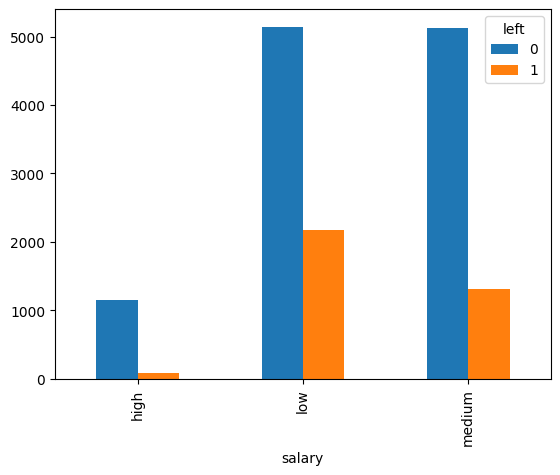

In [7]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

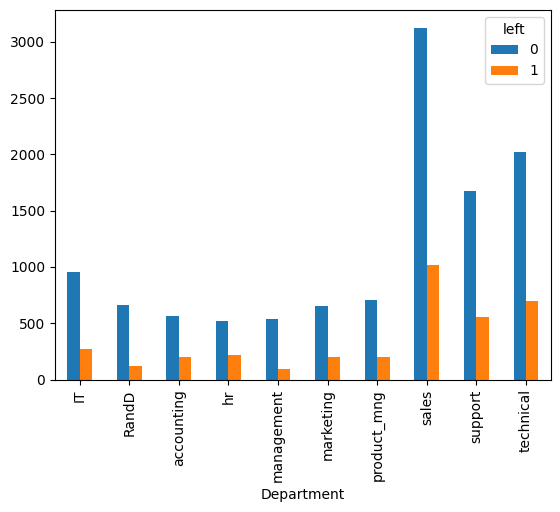

In [8]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

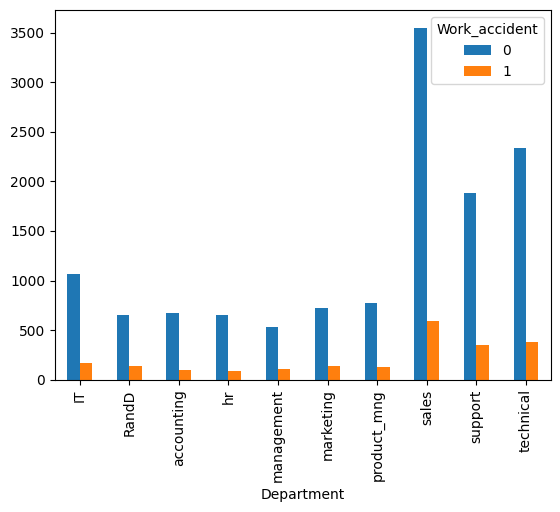

In [9]:
pd.crosstab(df.Department,df.Work_accident).plot(kind='bar')

<Axes: xlabel='Department'>

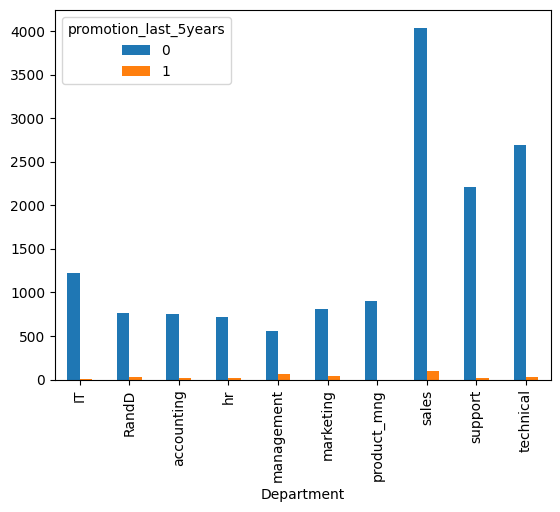

In [10]:
pd.crosstab(df.Department,df.promotion_last_5years).plot(kind='bar')

In [11]:
indf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
indf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [17]:
dummies = pd.get_dummies(indf.salary, dtype=int)
dummies.head(5)

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [28]:
new_df = pd.concat([indf, dummies] ,axis='columns')
new_df.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [29]:
new_df = new_df.drop(['salary'] ,axis='columns')
new_df.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, df.left, train_size=0.8, random_state=32)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [35]:
model.score(X_test,y_test)

0.78